In [78]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
df = pd.read_csv('/content/drive/MyDrive/Data/monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


Steps Required with FBProphet

- 1.Data Preprocessing  With Time Series
- 2.Model Fitting
- 3.Obtaining the forecast
- 4.Plotting the forecast
- 5.Cross validation
- 6.Computating Performance Metrics
- 7.Visualize the Performance Metrics
- 8.Conclusion

In [80]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [81]:
df.drop(168,axis=0,inplace=True)

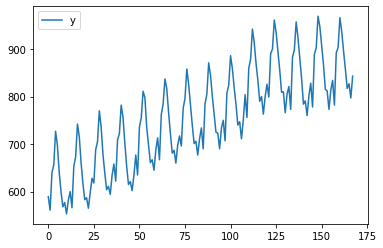

In [82]:
df.columns=["ds","y"]
df.plot()

In [83]:
### Shiftting to make it stationary

##### df['y'] = df['y']-df['y'].shift(1)

##### Not required shiftin

In [84]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


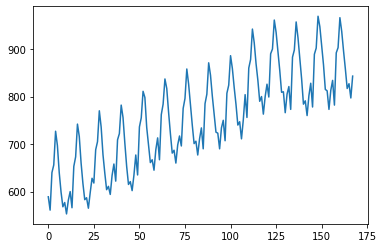

In [85]:
df['y'].plot()

In [86]:
df['ds'] = pd.to_datetime(df['ds'])

In [87]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


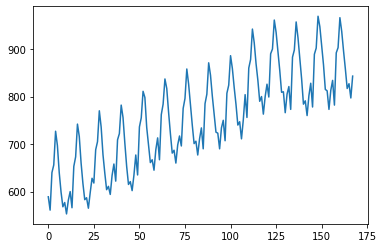

In [88]:
df['y'].plot()

In [89]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [90]:
from fbprophet import Prophet

In [91]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [92]:
### Intialize the model
model =Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [93]:
model

In [94]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0})])

In [95]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [96]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [97]:
df.tail()

,ds,y
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [98]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [99]:
# prediction
prediction = model.predict(future_dates)

In [100]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.941323,576.342919,597.171794,606.941323,606.941323,-20.151798,-20.151798,-20.151798,-20.151798,-20.151798,-20.151798,0.0,0.0,0.0,586.789525
1,1962-02-01,608.656256,536.159460,556.608039,608.656256,608.656256,-62.588619,-62.588619,-62.588619,-62.588619,-62.588619,-62.588619,0.0,0.0,0.0,546.067637
2,1962-03-01,610.205228,630.951100,651.788640,610.205228,610.205228,31.365739,31.365739,31.365739,31.365739,31.365739,31.365739,0.0,0.0,0.0,641.570967
3,1962-04-01,611.920161,648.464725,669.065290,611.920161,611.920161,46.703773,46.703773,46.703773,46.703773,46.703773,46.703773,0.0,0.0,0.0,658.623935
4,1962-05-01,613.579774,712.119761,731.080014,613.579774,613.579774,108.040207,108.040207,108.040207,108.040207,108.040207,108.040207,0.0,0.0,0.0,721.619981


In [101]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.347638,803.530583,826.435900
529,1976-11-27,818.479106,806.532556,830.200734
530,1976-11-28,821.790064,810.483441,832.743136
531,1976-11-29,825.219679,814.708901,836.299589
532,1976-11-30,828.699914,817.709124,840.411602


In [102]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.789525,576.342919,597.171794
1,1962-02-01,546.067637,536.159460,556.608039
2,1962-03-01,641.570967,630.951100,651.788640
3,1962-04-01,658.623935,648.464725,669.065290
4,1962-05-01,721.619981,712.119761,731.080014


#### Plotting the forecast

Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.


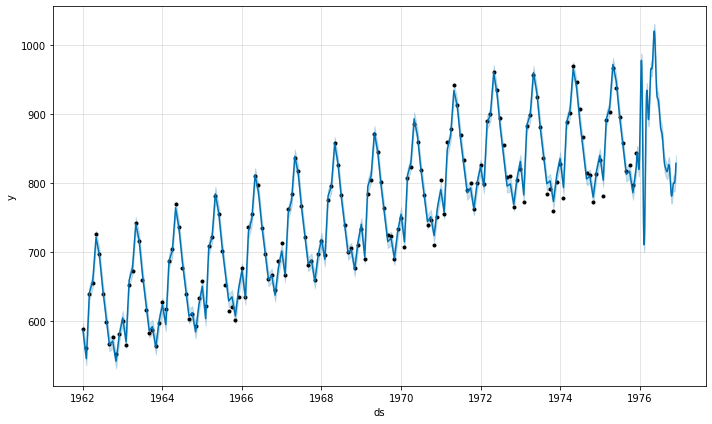

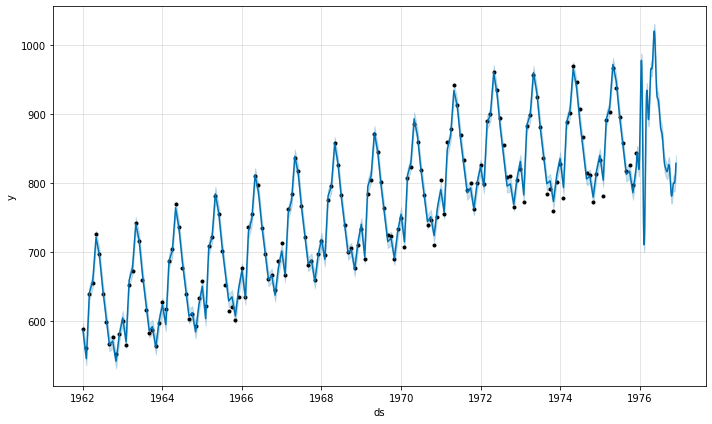

In [103]:
### plot the prediction
model.plot(prediction)

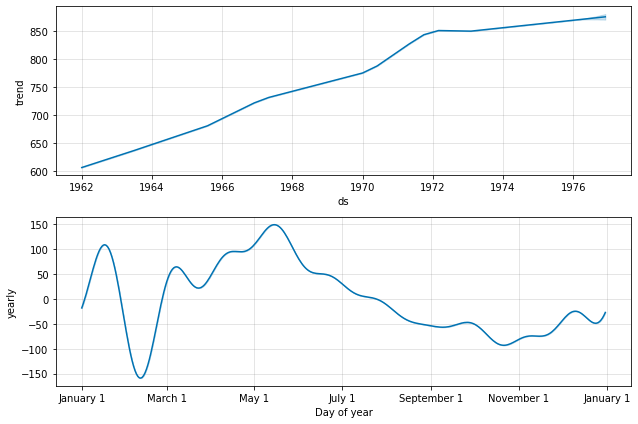

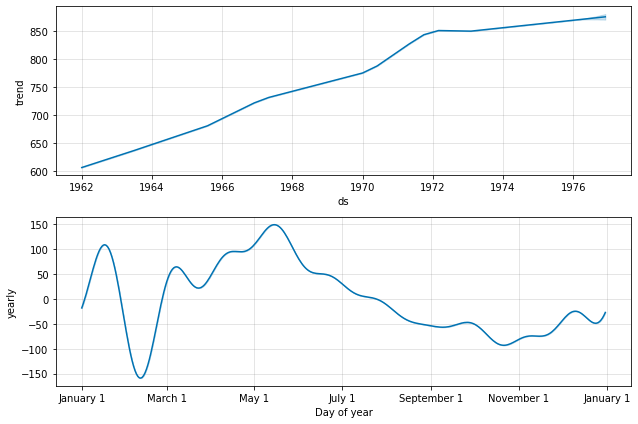

In [104]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)

### Cross Validation
Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

- 1.horizon the forecast horizon
-2. initial the size of the initial training period
-3.period the spacing between cutoff dates


In [105]:
df.shape

(168, 2)

In [106]:
from fbprophet.diagnostics import cross_validation

In [107]:
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [108]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [109]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,630.734519,628.784523,632.351964,622.0,1965-01-22
1,1965-03-01,715.209269,708.124256,721.344051,709.0,1965-01-22
2,1965-04-01,738.046179,723.024500,751.008274,722.0,1965-01-22
3,1965-05-01,809.508773,786.468323,830.735476,782.0,1965-01-22
4,1965-06-01,778.278652,746.141726,808.365344,756.0,1965-01-22


### Obtaining the performance Metrics

We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [110]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,255.110328,15.972174,12.522709,0.016138,0.014043,0.32
1,41 days,253.085086,15.908648,12.440669,0.016069,0.014043,0.32
2,42 days,267.466632,16.354407,12.890051,0.016696,0.014071,0.32
3,43 days,267.960409,16.369496,13.005926,0.016878,0.014071,0.32
4,46 days,252.637615,15.894578,12.615442,0.016331,0.014071,0.32


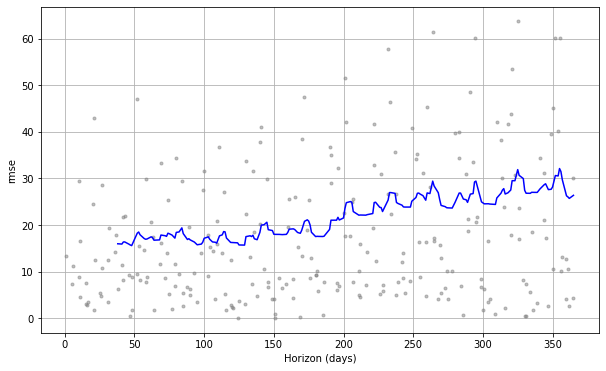

In [111]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')

Prophet is an open source framework from Facebook used for framing and forecasting time series.

 It focuses on an additive model where nonlinear trends fit with daily, weekly, and yearly seasonality and additional holiday effects. 
 
 Prophet is powerful at handling missing data and shifts within the trends and generally handles outliers well. 
 
 It also allows you to accumulate exogenous variables to the model.

Prophet uses a decomposable time-series model.

y(t) = g(t) + s(t) + h(t) + ϵt

where

g(t) = Trend (linear/logistic)

s(t) = Periodic change/seasonality

$$ s(t)=\sum \limits_{n=1}^N\left({a}_n\cos \left(\frac{2\pi nt}{P}\right)+{b}_n\sin \left(\frac{2\pi nt}{P}\right)\right) $$

Here, P is the consistent period we anticipate the time series to have (e.g., P = 365.25 for yearly data or P = 7 for weekly data, when we are scaling our time variable in days).

Fitting seasonality requires calculating the 2N parameters for β = [a1, b1,…., aN, bN]T by developing a matrix of seasonality vectors for each and every value of t in our historical data and future data.

h(t) = Effect of holiday

ϵt = Changes that are not adopted by the model

Note

The input to the Prophet model should always be a DataFrame with the columns ds and y, with ds being a date field (YYYY-MM-DD or YYYY-MM-DD HH:MM:SS) with a corresponding y variable.

In [112]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from fbprophet import Prophet

In [113]:
#Checking fbprophet Version
fbprophet.__version__

'0.7.1'

In [114]:
# checking numpy version
np.__version__

'1.19.5'

In [116]:
df = pd.read_csv('/content/drive/MyDrive/Data/Bike_Sharing_Demand.csv')

In [117]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [118]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [119]:
df = df.rename(columns={'datetime': 'ds', 'count': 'y'})


In [120]:
validate = df[['ds','y']].tail(48)

df.drop(df[['ds','y']].tail(48).index,inplace=True)

train = df[['ds','y']]


In [121]:
m = Prophet(yearly_seasonality=False)

In [122]:
m.fit(train)
p = 48
future = m.make_future_dataframe(periods=p,freq='H',include_history=False)


In [123]:
future

,ds
0,2012-12-18 00:00:00
1,2012-12-18 01:00:00
2,2012-12-18 02:00:00
3,2012-12-18 03:00:00
4,2012-12-18 04:00:00
5,2012-12-18 05:00:00
6,2012-12-18 06:00:00
7,2012-12-18 07:00:00
8,2012-12-18 08:00:00
9,2012-12-18 09:00:00


In [124]:
forecast = m.predict(future)

In [125]:
timeseries_evaluation_metrics_func(validate.y,forecast.yhat)

MSE is : 9948.034471033616
MAE is : 65.22079826823841
RMSE is : 99.73983392323058
MAPE is : 105.17542355581932
R2 is : 0.6997205046587648



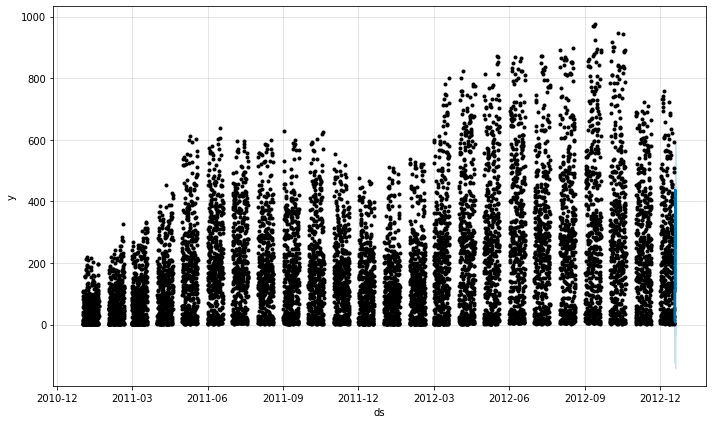

In [126]:
fig1 = m.plot(forecast)

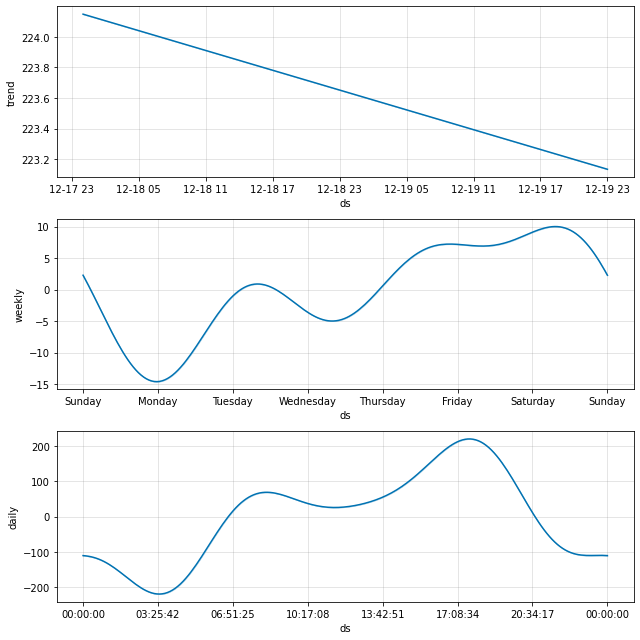

In [127]:
fig2 = m.plot_components(forecast)

The add_changepoints_to_plot function adds red lines; the vertical dashed lines are changepoints where Prophet has identified that the trend has changed

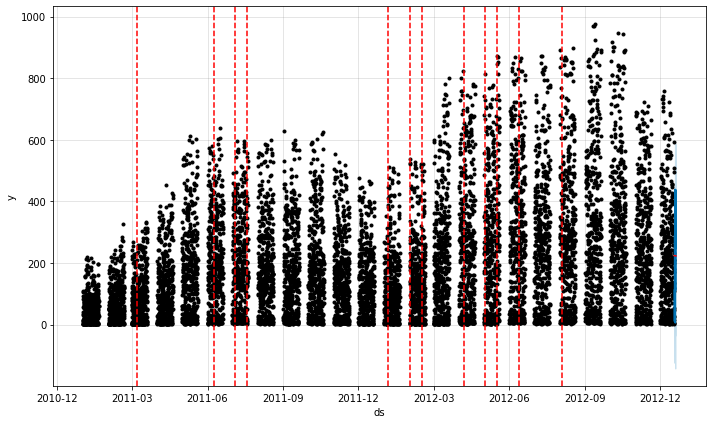

In [128]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

n the previous section, you learned how to model time-series problems using Prophet. In this section, let’s apply log transformations on the data and check whether the accuracy increases.

Log-transformed data follows a normal or near-normal distribution

In [129]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from fbprophet import Prophet

In [130]:
df.head()

,ds,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,y
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [131]:
validate = df[['ds','y']].tail(48)
df.drop(df[['ds','y']].tail(48).index,inplace=True)
train = df[['ds','y']]
train.head()

,ds,y
0,2011-01-01 00:00:00,16
1,2011-01-01 01:00:00,40
2,2011-01-01 02:00:00,32
3,2011-01-01 03:00:00,13
4,2011-01-01 04:00:00,1


In [132]:
train['y'] = np.log(train['y'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [133]:
m = Prophet(yearly_seasonality=False)
m.fit(train)

In [134]:
p = 48
future = m.make_future_dataframe(periods=p,freq='H',include_history=False)

forecast = m.predict(future)

In [135]:
# inverse log the results
forecast['yhat'] = np.exp(forecast['yhat'])   

In [136]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-12-16 00:00:00,4.817275,3.302440,5.004566,4.817275,4.817275,-0.603360,-0.603360,-0.603360,-0.668827,-0.668827,-0.668827,0.065466,0.065466,0.065466,0.0,0.0,0.0,67.620745
1,2012-12-16 01:00:00,4.817189,2.620970,4.274696,4.817189,4.817189,-1.335506,-1.335506,-1.335506,-1.391787,-1.391787,-1.391787,0.056281,0.056281,0.056281,0.0,0.0,0.0,32.514376
2,2012-12-16 02:00:00,4.817102,1.741685,3.435621,4.817102,4.817102,-2.207677,-2.207677,-2.207677,-2.254568,-2.254568,-2.254568,0.046891,0.046891,0.046891,0.0,0.0,0.0,13.591237
3,2012-12-16 03:00:00,4.817016,1.171663,2.833750,4.817016,4.817016,-2.791380,-2.791380,-2.791380,-2.828722,-2.828722,-2.828722,0.037342,0.037342,0.037342,0.0,0.0,0.0,7.580931
4,2012-12-16 04:00:00,4.816930,1.297291,2.959768,4.816930,4.816930,-2.683489,-2.683489,-2.683489,-2.711170,-2.711170,-2.711170,0.027680,0.027680,0.027680,0.0,0.0,0.0,8.443868


In [137]:
timeseries_evaluation_metrics_func(validate.y,forecast['yhat'])

MSE is : 12001.430240498388
MAE is : 77.55011915376723
RMSE is : 109.55103943139193
MAPE is : 95.20570363785941
R2 is : 0.46359300247447044



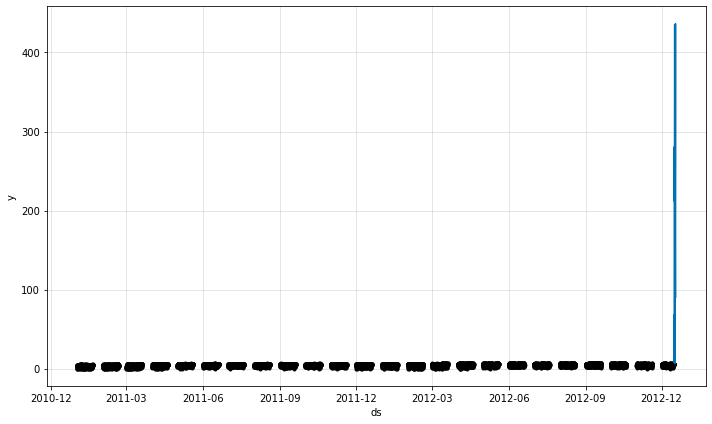

In [138]:
fig1 = m.plot(forecast)

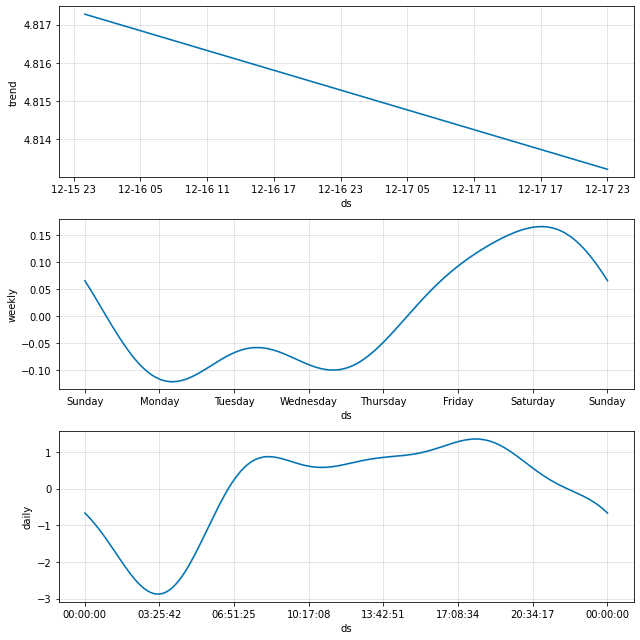

In [139]:
fig2 = m.plot_components(forecast)

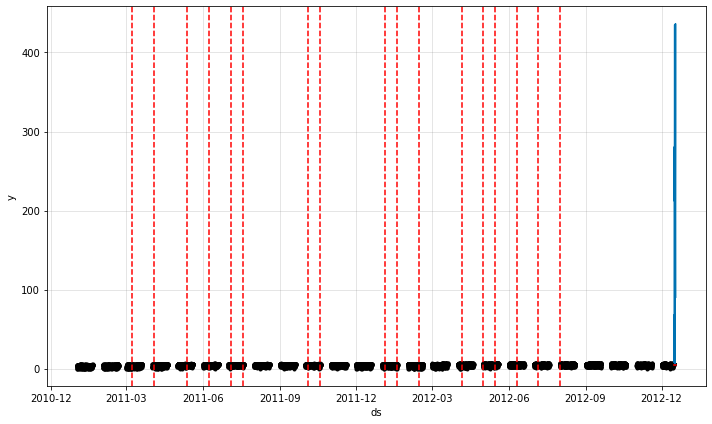

In [140]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

By applying a log transformation, we didn’t see an increase in the model accuracy; rather, it was reduced.

In this section, let’s add US country holidays, which is built in to Prophet, and check whether the accuracy increases.

Prophet includes holidays for these countries: Brazil (BR), Indonesia (ID), India (IN), Malaysia (MY), Vietnam (VN), Thailand (TH), Philippines (PH), Turkey (TU), Pakistan (PK), Bangladesh (BD), Egypt (EG), China (CN), and Russia (RU).

In [141]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from fbprophet import Prophet

In [142]:
validate = df[['ds','y']].tail(48)

df.drop(df[['ds','y']].tail(48).index,inplace=True)

train = df[['ds','y']]


In [143]:
m = Prophet(yearly_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(train)

In [144]:
p = 48
future = m.make_future_dataframe(periods=p,freq='H',include_history=False)

In [145]:
forecast = m.predict(future)

timeseries_evaluation_metrics_func(validate.y,forecast.yhat)

MSE is : 10640.85467872739
MAE is : 73.0004519460163
RMSE is : 103.15451846006258
MAPE is : 133.0020356009498
R2 is : 0.613363256717725



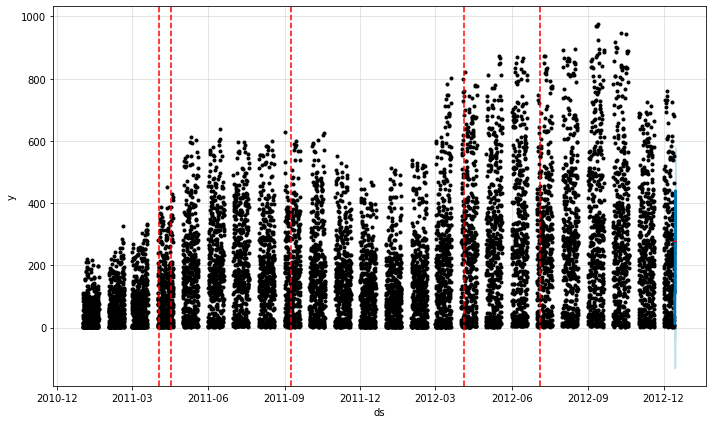

In [146]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Adding Exogenous variables using add_regressors(function)

In this section, let’s add exogenous variables, which might influence target variables, and check whether the accuracy increases. 

We can call this problem a multivariant time-series problem too.

In [147]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from fbprophet import Prophet

In [148]:
df = pd.read_csv('/content/drive/MyDrive/Data/Bike_Sharing_Demand.csv')

In [149]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [150]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [151]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [152]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [153]:
df = df.rename(columns={'datetime': 'ds', 'count': 'y'})

In [154]:
validate = df[['ds','y','season','holiday','weather','temp','humidity','windspeed']].tail(48)

In [155]:
df.drop(df[['ds','y','season','holiday','weather','temp','humidity','windspeed']].tail(48).index,inplace=True)

In [156]:
train = df[['ds','y','season','holiday','weather','temp','humidity','windspeed']]

In [157]:
m = Prophet( yearly_seasonality=True)
m.add_regressor('season')
m.add_regressor('holiday')
m.add_regressor('weather')
m.add_regressor('temp')
m.add_regressor('humidity')
m.add_regressor('windspeed')

In [158]:
m.fit(train)

In [159]:
p = 48
future = m.make_future_dataframe(periods=p,freq='H',include_history=False)

In [160]:
future['season'] = validate['season'].values 
future['holiday'] = validate['holiday'].values 
future['weather'] =  validate['weather'].values
future['temp'] = validate['temp'].values 
future['humidity'] =  validate['humidity'].values
future['windspeed'] = validate['windspeed'].values 

In [161]:
forecast = m.predict(future)

In [162]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,holiday,holiday_lower,holiday_upper,humidity,humidity_lower,humidity_upper,season,season_lower,season_upper,temp,temp_lower,temp_upper,weather,weather_lower,weather_upper,weekly,weekly_lower,weekly_upper,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-12-18 00:00:00,277.789445,-48.945638,225.402898,277.789445,277.789445,-186.426188,-186.426188,-186.426188,-101.170369,-101.170369,-101.170369,-79.880764,-79.880764,-79.880764,0.0,0.0,0.0,-25.934275,-25.934275,-25.934275,-30.392783,-30.392783,-30.392783,-11.252581,-11.252581,-11.252581,-14.508580,-14.508580,-14.508580,-1.837345,-1.837345,-1.837345,2.207454,2.207454,2.207454,-3.537710,-3.537710,-3.537710,0.0,0.0,0.0,91.363257
1,2012-12-18 01:00:00,277.799652,-66.259373,210.174218,277.799652,277.799652,-201.425889,-201.425889,-201.425889,-116.608469,-116.608469,-116.608469,-79.880764,-79.880764,-79.880764,0.0,0.0,0.0,-25.934275,-25.934275,-25.934275,-30.392783,-30.392783,-30.392783,-11.252581,-11.252581,-11.252581,-14.508580,-14.508580,-14.508580,-1.245968,-1.245968,-1.245968,2.207454,2.207454,2.207454,-3.690688,-3.690688,-3.690688,0.0,0.0,0.0,76.373763
2,2012-12-18 02:00:00,277.809859,-90.699267,180.456900,277.809859,277.809859,-241.008008,-241.008008,-241.008008,-157.936120,-157.936120,-157.936120,-78.526396,-78.526396,-78.526396,0.0,0.0,0.0,-21.090592,-21.090592,-21.090592,-30.392783,-30.392783,-30.392783,-11.252581,-11.252581,-11.252581,-14.508580,-14.508580,-14.508580,-0.701540,-0.701540,-0.701540,-1.281860,-1.281860,-1.281860,-3.843951,-3.843951,-3.843951,0.0,0.0,0.0,36.801851
3,2012-12-18 03:00:00,277.820066,-123.620305,164.487079,277.820066,277.820066,-257.229996,-257.229996,-257.229996,-196.500628,-196.500628,-196.500628,-56.524558,-56.524558,-56.524558,0.0,0.0,0.0,-21.090592,-21.090592,-21.090592,-30.392783,-30.392783,-30.392783,-15.422142,-15.422142,-15.422142,10.498416,10.498416,10.498416,-0.207312,-0.207312,-0.207312,-0.117457,-0.117457,-0.117457,-3.997499,-3.997499,-3.997499,0.0,0.0,0.0,20.590069
4,2012-12-18 04:00:00,277.830272,-109.787310,162.695312,277.830272,277.830272,-246.722807,-246.722807,-246.722807,-192.285219,-192.285219,-192.285219,-50.520367,-50.520367,-50.520367,0.0,0.0,0.0,-16.246909,-16.246909,-16.246909,-30.392783,-30.392783,-30.392783,-15.422142,-15.422142,-15.422142,10.498416,10.498416,10.498416,0.234105,0.234105,0.234105,1.043051,1.043051,1.043051,-4.151326,-4.151326,-4.151326,0.0,0.0,0.0,31.107466


In [163]:
timeseries_evaluation_metrics_func(validate.y,forecast.yhat)

MSE is : 10526.404140524528
MAE is : 66.75494445049685
RMSE is : 102.5982657773733
MAPE is : 115.19425853774175
R2 is : 0.6822625281126338



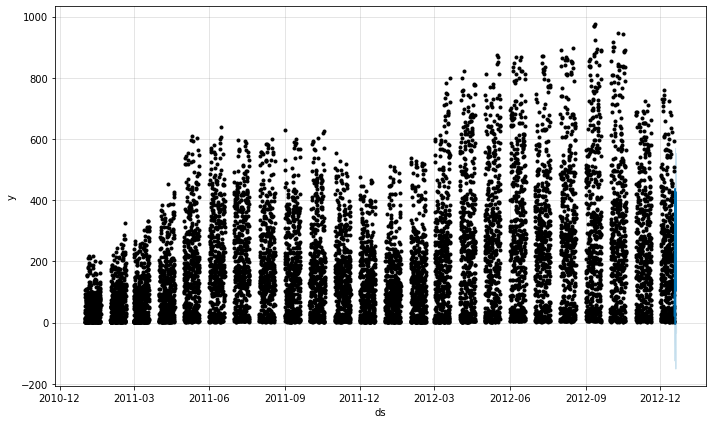

In [164]:
fig1 = m.plot(forecast)

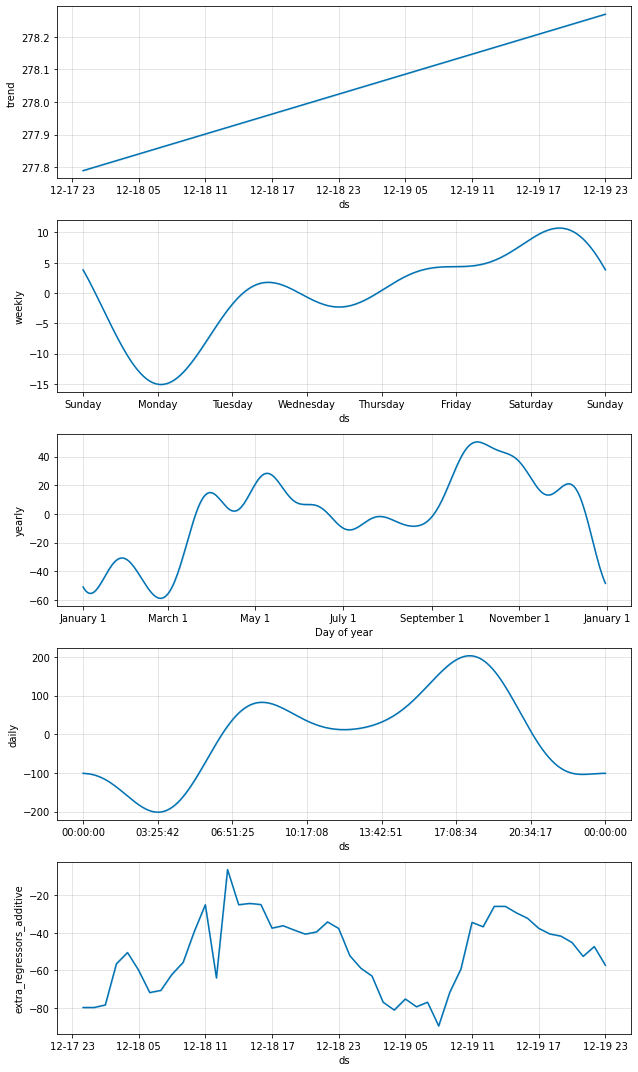

In [165]:
fig2 = m.plot_components(forecast)

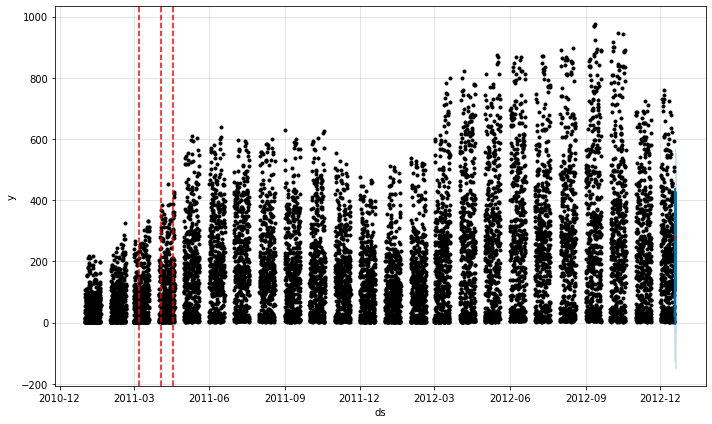

In [166]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Summary

In this chapter, you learned about the high-level math behind Prophet, how to create a basic model, how to apply log transformations to time-series data, how to add country holidays, and how to handle multivariate time-series data using add_regressor.